# Advanced Data Visualisation

- Waffle Chart
- Word Cloud
- Maps with Marker, Choropleth


In [54]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Waffle Chart

Biasa digunakan untuk membuat visual perbedaan proporsi, memiliki lebih banyak informasi dibanding pie chart


In [4]:
# import data
df_can = pd.read_excel("dataset/Canada.xlsx")

df_can

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,International Migration Flows to and from Sele...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POP/DB/MIG/Flow/Rev.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# explore excel bisa dilakukan di pandas juga
excel_can = pd.ExcelFile("dataset/Canada.xlsx")

excel_can.sheet_names

['Regions by Citizenship',
 'Canada by Citizenship',
 'Canada by Citizenship (2)']

In [11]:
# kita mau ambil data di tabel 'Canada by Citizenship' tanpa 20 baris pertama

df_can = pd.read_excel("dataset/Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


Untuk perbandingan proporsi, seringkali kita gunakan groupby untuk mengelompokkan data per grup sebelum kita buat visualisasinya


In [12]:
df_can['AreaName'].value_counts()

AreaName
Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: count, dtype: int64

In [16]:
# misal kita bandingin proporsi per benua
# di tahun 2010 ada berapa banyak imigran yang masuk ke Canada
df_can_area2010 = df_can.groupby('AreaName').agg({2010: sum})
df_can_area2010

C:\Users\user\AppData\Local\Temp\ipykernel_3320\3182108838.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_can_area2010 = df_can.groupby('AreaName').agg({2010: sum})


,2010
AreaName,
Africa,40892
Asia,163845
Europe,33425
Latin America and the Caribbean,28818
Northern America,8142
Oceania,1834


<Axes: ylabel='2010'>

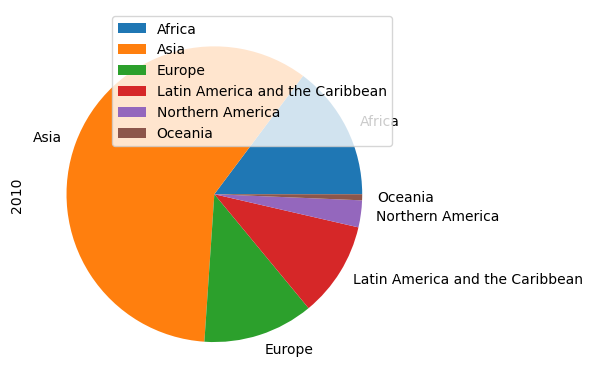

In [19]:
df_can_area2010.plot(kind="pie", y=2010)

In [21]:
sum2010 = df_can_area2010[2010].sum()
sum2010

276956

menghitung proporsi dalam persentase untuk membuat waffle chart


In [30]:
df_can_area2010['proporsi'] = round(df_can_area2010[2010]/sum2010*100)/100

df_can_area2010

,2010,proporsi,tiles
AreaName,,,
Africa,40892,0.15,148.0
Asia,163845,0.59,592.0
Europe,33425,0.12,121.0
Latin America and the Caribbean,28818,0.10,104.0
Northern America,8142,0.03,29.0
Oceania,1834,0.01,7.0


menentukan ukuran waffle chart brp kali brp


In [31]:
width = 50  # width of chart
height = 20  # height of chart

total_num_tiles = width * height  # total number of tiles

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  1000


In [32]:
df_can_area2010['tiles'] = round(df_can_area2010['proporsi'] * total_num_tiles)

df_can_area2010

,2010,proporsi,tiles
AreaName,,,
Africa,40892,0.15,150.0
Asia,163845,0.59,590.0
Europe,33425,0.12,120.0
Latin America and the Caribbean,28818,0.10,100.0
Northern America,8142,0.03,30.0
Oceania,1834,0.01,10.0


In [33]:
df_can_area2010['tiles'].sum()

1000.0

kita sudah pastikan jumlah tiles sesuai, berikutnya kita build waffle chart


In [35]:
waffle_chart = np.zeros((height, width))
# waffle_chart

In [38]:
# define indices to loop through waffle chart
tiles_per_category = df_can_area2010['tiles']

category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')

# waffle_chart

Waffle chart populated!


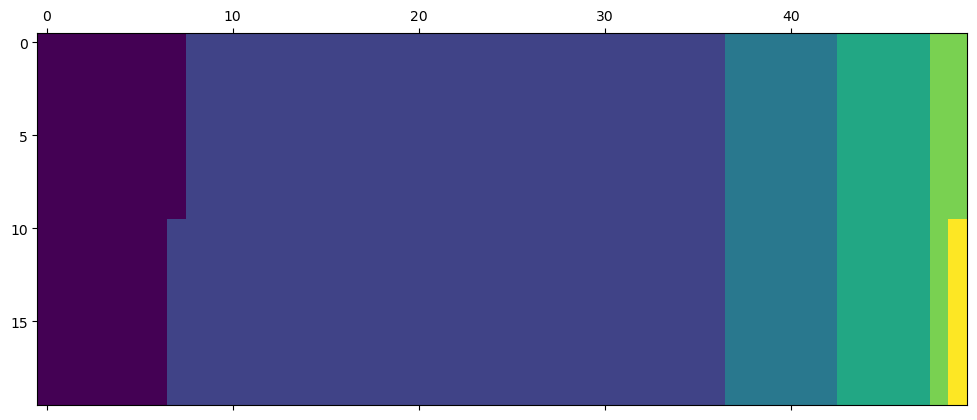

In [40]:
plt.matshow(waffle_chart)

In [42]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

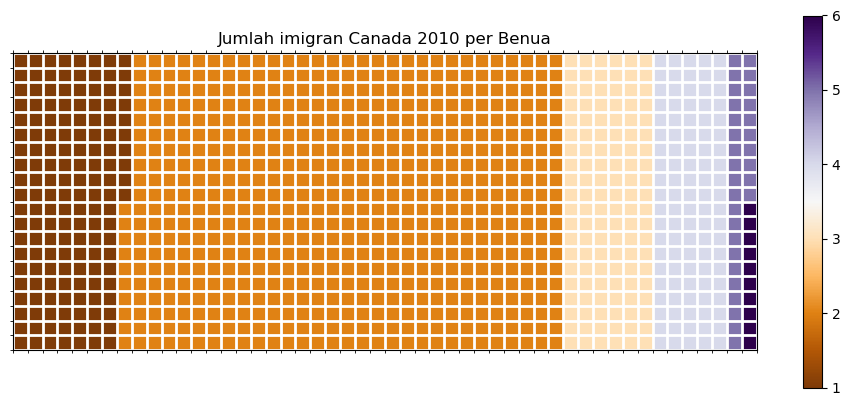

In [45]:
# percantik visualisasi

colormap = plt.cm.PuOr
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

plt.title("Jumlah imigran Canada 2010 per Benua")
plt.show()

In [47]:
df_can_area2010

,2010,proporsi,tiles
AreaName,,,
Africa,40892,0.15,150.0
Asia,163845,0.59,590.0
Europe,33425,0.12,120.0
Latin America and the Caribbean,28818,0.10,100.0
Northern America,8142,0.03,30.0
Oceania,1834,0.01,10.0


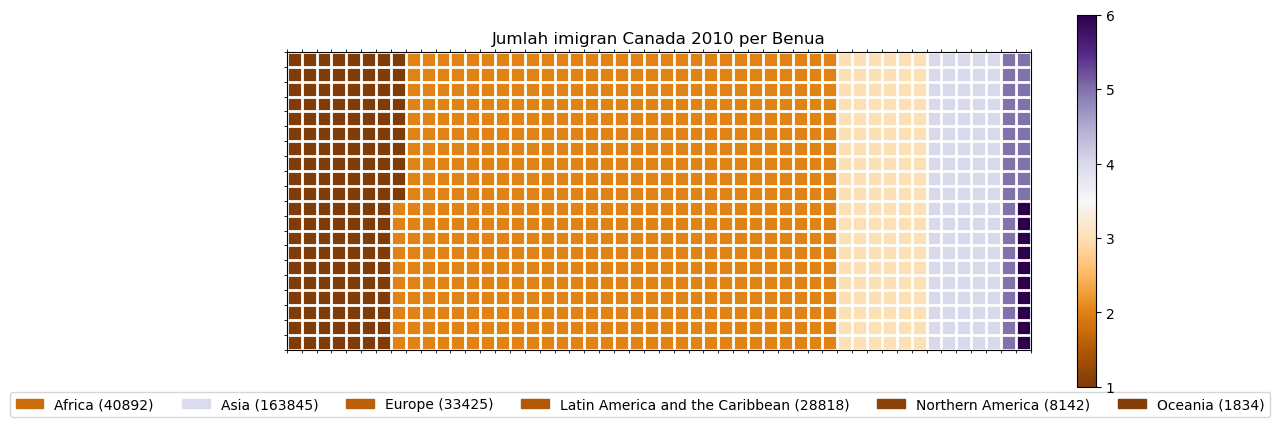

In [59]:
colormap = plt.cm.PuOr
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

plt.title("Jumlah imigran Canada 2010 per Benua")

# tambahkan legend
# create legend
legend_handles = []
for i, category in enumerate(df_can_area2010.index):
    label_str = f"{category} ({df_can_area2010.loc[category, 2010]})"
    color_val = colormap(df_can_area2010.loc[category, 'proporsi'])
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_can_area2010.index),
           bbox_to_anchor=(0., -0.25, 0.95, .1)
           )


plt.show()

In [65]:
# membuat shortcut, kita kumpulkan step2 pembuatan wafflechart di sebuah function

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height  # total number of tiles
    print('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles)
                          for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(categories[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    # total_values = values_cumsum[len(values_cumsum) - 1]
    total_values = values_cumsum[-1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + \
                ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + \
                ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Total number of tiles is 50
A: 17
B: 8
C: 25


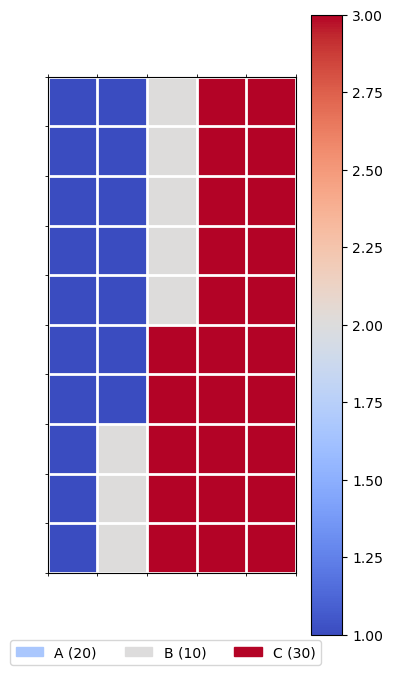

In [66]:
create_waffle_chart(["A", "B", "C"], [20, 10, 30], 10, 5, 'PuOr')